In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [5]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
customer_data.shape

(200, 5)

In [9]:
customer_data. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
customer_data.isnull().sum() 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
X = customer_data.iloc[:,[3,4]].values

In [23]:
#Choosing the number of clusters
#WCSS -> Within cluster Sum of Squares. We will find the distance from each point
wcss = []
for i in range(1,11):
     kmeans = KMeans(n_clusters = i, init = 'k-means++',  random_state = 42)
     kmeans.fit(X)
    
     wcss.append(kmeans.inertia_)


C:\Users\Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

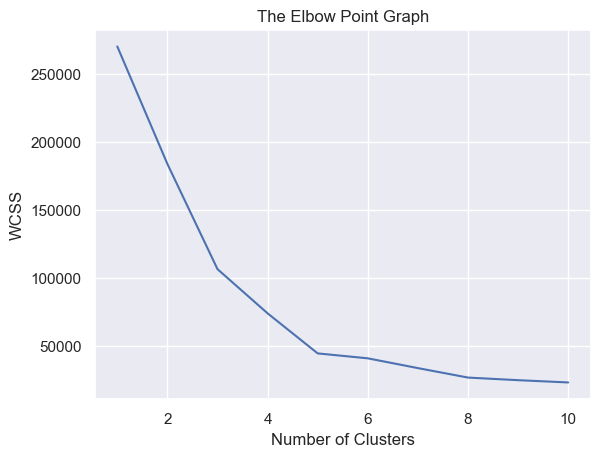

In [27]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
#optimum number of clusters is 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


C:\Users\Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


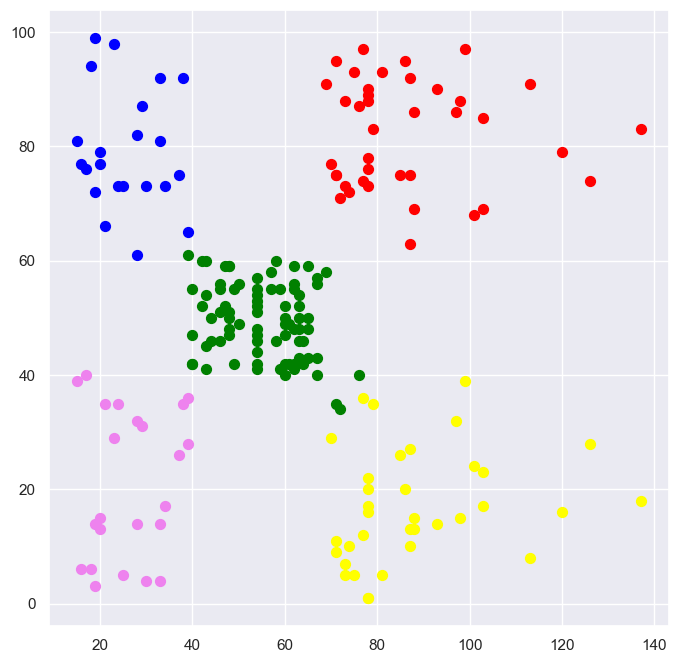

In [41]:
#visualizing all the clusters
plt.figure(figsize = (8,8))
plt.scatter(X[Y == 0,0], X[Y ==0, 1], s=50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y == 1,0], X[Y ==1, 1], s=50, c = 'red', label = 'Cluster 2')
plt.scatter(X[Y == 2,0], X[Y ==2, 1], s=50, c = 'yellow', label = 'Cluster 3')
plt.scatter(X[Y == 3,0], X[Y ==3, 1], s=50, c = 'violet', label = 'Cluster 4')
plt.scatter(X[Y == 4,0], X[Y ==4, 1], s=50, c = 'blue', label = 'Cluster 5')

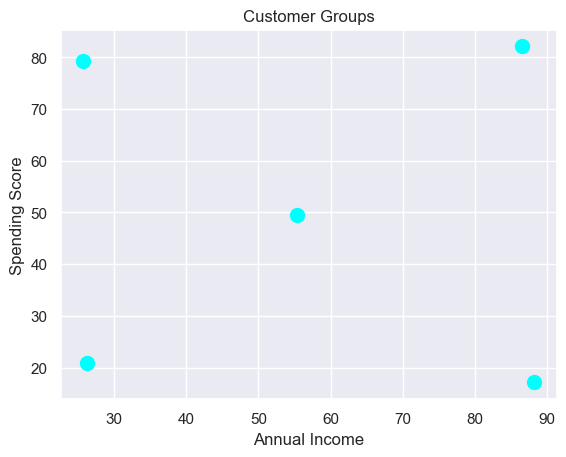

In [47]:
#visualizing centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'cyan', label = 'Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

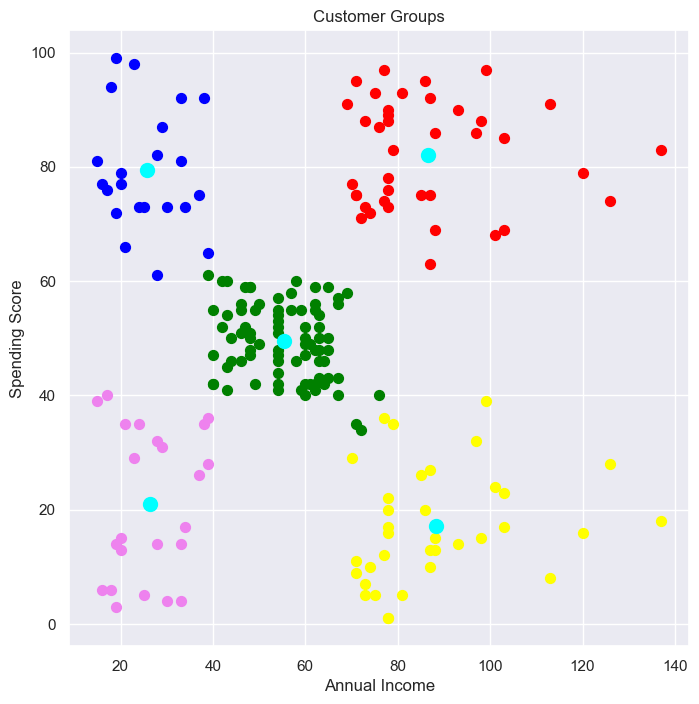

In [49]:
#full cluster
#visualizing all the clusters
plt.figure(figsize = (8,8))
plt.scatter(X[Y == 0,0], X[Y ==0, 1], s=50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y == 1,0], X[Y ==1, 1], s=50, c = 'red', label = 'Cluster 2')
plt.scatter(X[Y == 2,0], X[Y ==2, 1], s=50, c = 'yellow', label = 'Cluster 3')
plt.scatter(X[Y == 3,0], X[Y ==3, 1], s=50, c = 'violet', label = 'Cluster 4')
plt.scatter(X[Y == 4,0], X[Y ==4, 1], s=50, c = 'blue', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'cyan', label = 'Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()